<a href="https://colab.research.google.com/github/drihn/EXERCISE_DEEPLEARNING/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [ ]:
dataset.head()

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5


In [ ]:
dataset.rename(columns={'rating': 'sentiment'}, inplace=True)

def convert_rating_to_sentiment(rating):
  if rating >= 3:
    return 1  # Positive
  else:
    return 0  # Negative

dataset['sentiment'] = dataset['sentiment'].apply(convert_rating_to_sentiment)

dataset.head()
dataset.info()
dataset['sentiment'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1001 non-null   object
 1   sentiment  1001 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


,count
sentiment,
1,621
0,380


In [ ]:
dataset.head()

,review,sentiment
0,sir okay armygreen shorts nice,1
1,di pareha yong mga size nila may sobrang liit ...,1
2,super worth it ang ganda Sombra grabi order na...,1
3,ganda po salamat,1
4,maayos pagkadeliver maganda den sya,1


## 1. Tokenize the data

In [ ]:
vocab_size = 5000
oov_token = ""

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(dataset['review'])

## 2. Sequence the data

In [ ]:
sequences = tokenizer.texts_to_sequences(dataset['review'])

In [ ]:

max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

## 3. Pad the data

In [ ]:
max_length = 50
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

## 4. Train a sentiment model

In [ ]:
X = padded_sequences
y = np.array(dataset['sentiment'])

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 32, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=80, validation_data=(X_val, y_val))

Epoch 1/80


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5630 - loss: 0.6890 - val_accuracy: 0.6219 - val_loss: 0.6713
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6254 - loss: 0.6604 - val_accuracy: 0.6219 - val_loss: 0.6668
Epoch 3/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6170 - loss: 0.6615 - val_accuracy: 0.6169 - val_loss: 0.6612
Epoch 4/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6493 - loss: 0.6401 - val_accuracy: 0.6169 - val_loss: 0.6533
Epoch 5/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6503 - loss: 0.6342 - val_accuracy: 0.6269 - val_loss: 0.6363
Epoch 6/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6420 - loss: 0.6184 - val_accuracy: 0.6468 - val_loss: 0.6131
Epoch 7/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6995 - loss: 0.5759 - val_accuracy: 0.6816 - val_loss: 0.5846
Epoch 8/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7857 - loss: 0.5337 - val_accuracy: 0.7214 - val_loss: 0.5535
Ep

## Get files for visualing the network

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)


(5000, 32)


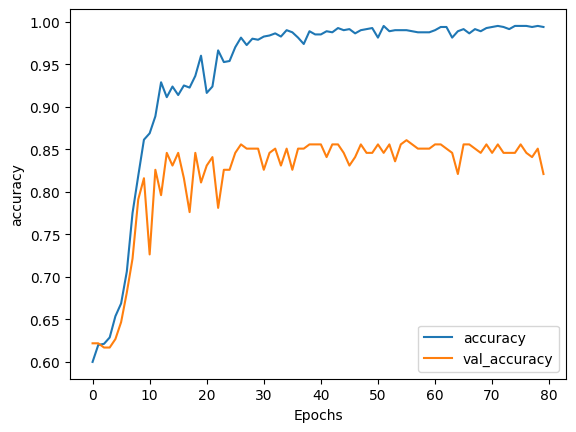

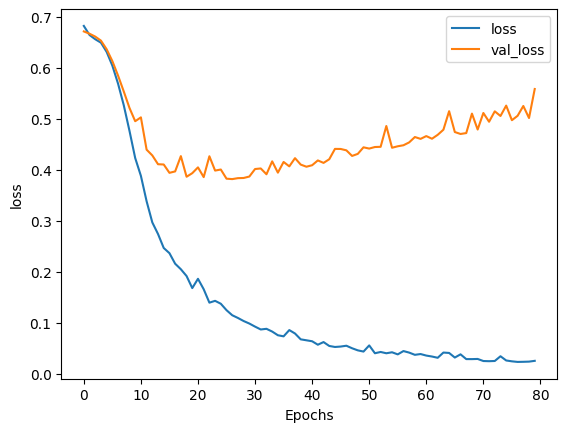

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
import io

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in reverse_word_index:
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 5. Predict sentiment with new reviews

In [ ]:
new_reviews = [
    "tarantado kang maganda ka!",
    "ang galing mong kupal ka!",
    "Mama mo Maganda",
    "Akin ka nalang hayuf ka!",
    "Bagsak ang pasado",
    "Magaling ang sinungaling!",
    "Pogi ang Late!"
]

new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_padded = pad_sequences(new_sequences, maxlen=max_length, padding='post', truncating='post')

predictions = model.predict(new_padded)

for i, review in enumerate(new_reviews):
    sentiment = "Positive" if predictions[i] >= 0.5 else "Negative"
    print(f"Review: {review}\nSentiment: {sentiment} (Confidence: {predictions[i][0]:.2f})\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Review: tarantado kang maganda ka!
Sentiment: Positive (Confidence: 0.70)

Review: ang galing mong kupal ka!
Sentiment: Negative (Confidence: 0.14)

Review: Mama mo Maganda
Sentiment: Positive (Confidence: 0.57)

Review: Akin ka nalang hayuf ka!
Sentiment: Negative (Confidence: 0.43)

Review: Bagsak ang pasado
Sentiment: Negative (Confidence: 0.32)

Review: Magaling ang sinungaling!
Sentiment: Negative (Confidence: 0.32)

Review: Pogi ang Late!
Sentiment: Negative (Confidence: 0.28)

